# Immigration to Canada Project

### Import Libraries

In [1]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


### Fetching Data

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

In this lab, we will focus on the Canadian Immigration data and use the already cleaned dataset and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>.

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
print(df_can.shape)

(195, 39)


In [5]:
df_can.set_index('Country', inplace= True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
# let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## Visualizing Data

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti.

**Let's visualize the immigration from Haiti with a Line plot**

In [8]:
#First, we will extract the data series for Haiti 

haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

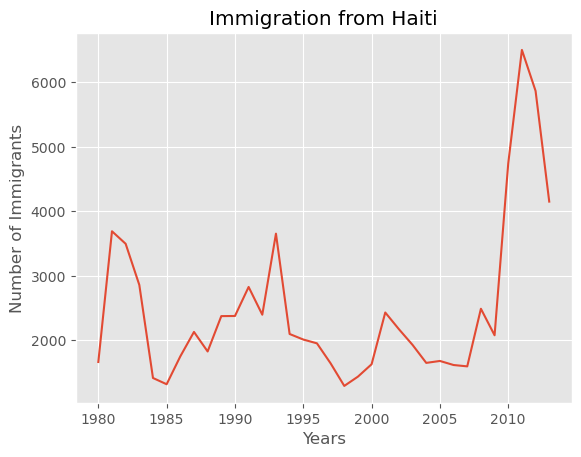

In [9]:
haiti.plot(kind='line')

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Immigration from Haiti')
plt.show();

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.

However, notice that years are of type string. Let's change the type of the index values to integer first.

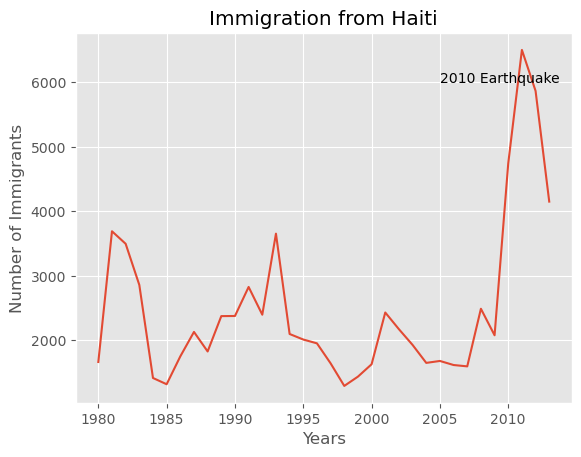

In [10]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake
# syntax: plt.text(x,y, label)

plt.text(2005, 6000, '2010 Earthquake')

plt.show()

**Number of immigrants from India and China from 1980 to 2013**

In [11]:
df_ci = df_can.loc[['China','India'], years]
df_ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Since df_CI is a dataframe with the country as the index and years as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [12]:
df_ci = df_ci.transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


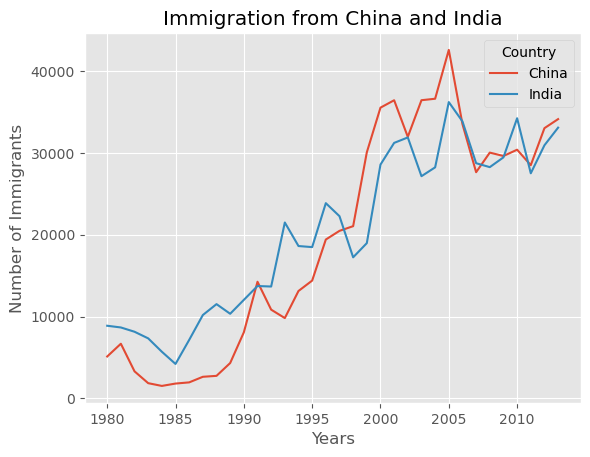

In [13]:
df_ci.index = df_ci.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_ci.plot(kind='line')

plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.title('Immigration from China and India')

plt.show()

Note: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because haiti is a series as opposed to a dataframe, and has the years as its indices.

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**The trend of top 5 countries that contributed the most to immigration to Canada**

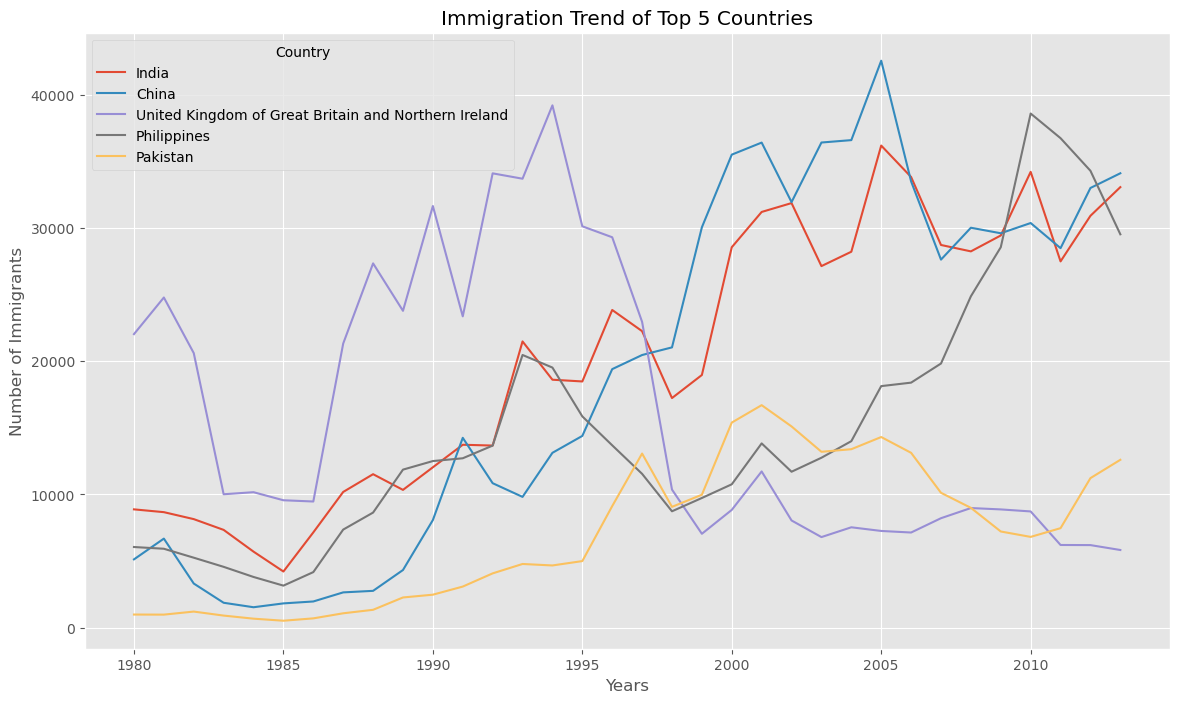

In [14]:
df_can.sort_values(by='Total', ascending= False, axis=0, inplace= True)

# get the top 5 entries
df_top5 = df_can.head(5)

#transpose the dataframe

df_top5 = df_top5[years].transpose()


#Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()


#### Visualizing the Trend of Top 5 Countries with Area Plot

In [15]:
df_can.sort_values('Total', ascending= False, axis=0, inplace=True)

#get the top 5 countries 
df_top5 = df_can.head()

#transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


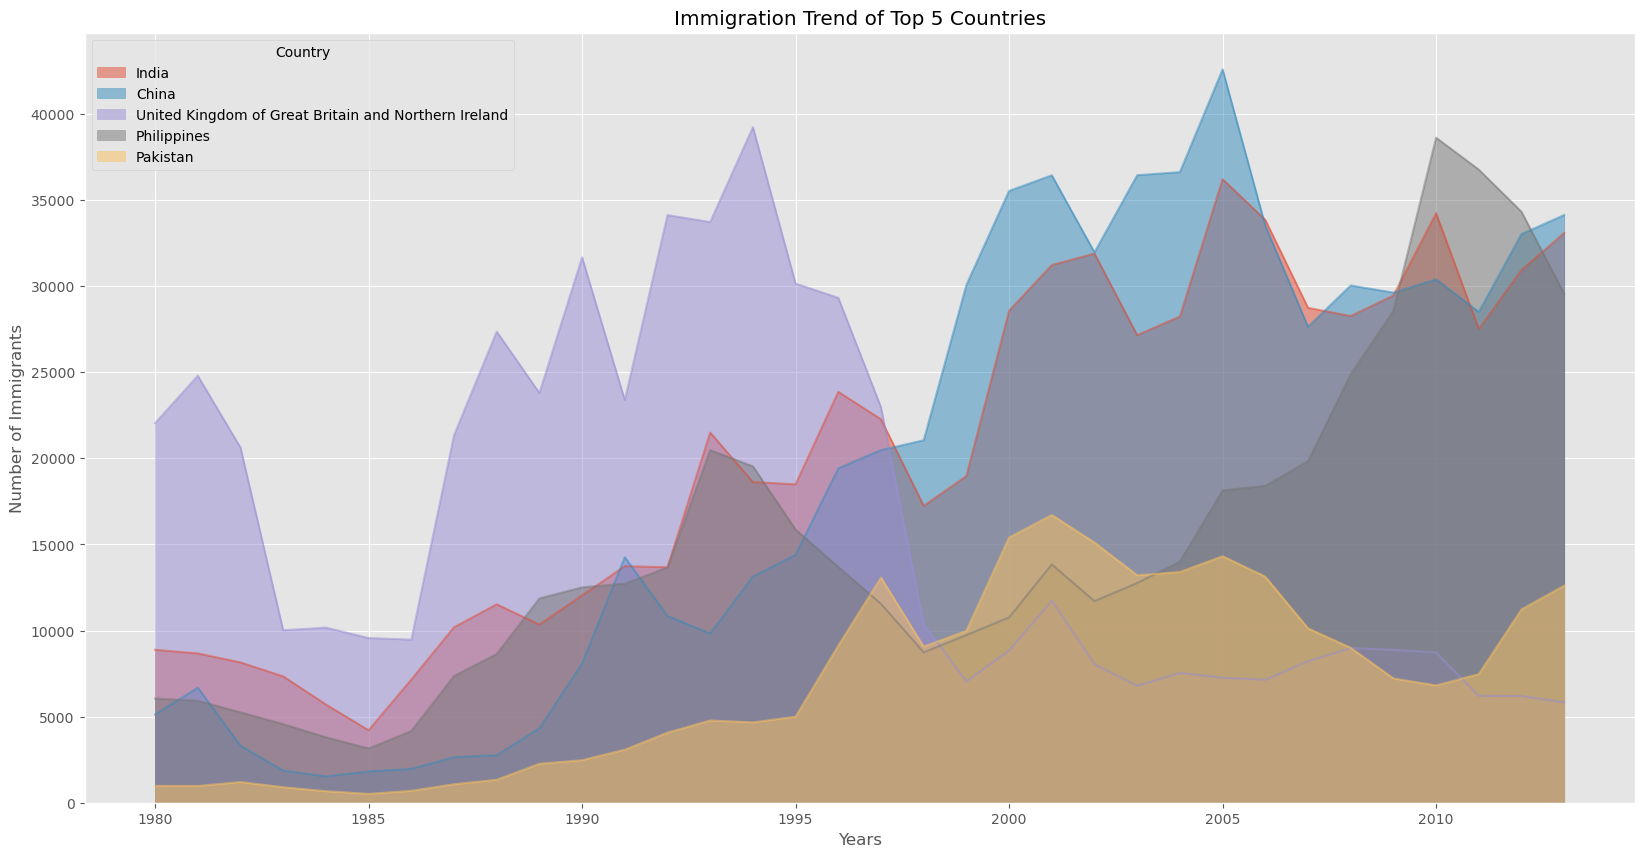

In [16]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', stacked=False, figsize=(20,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

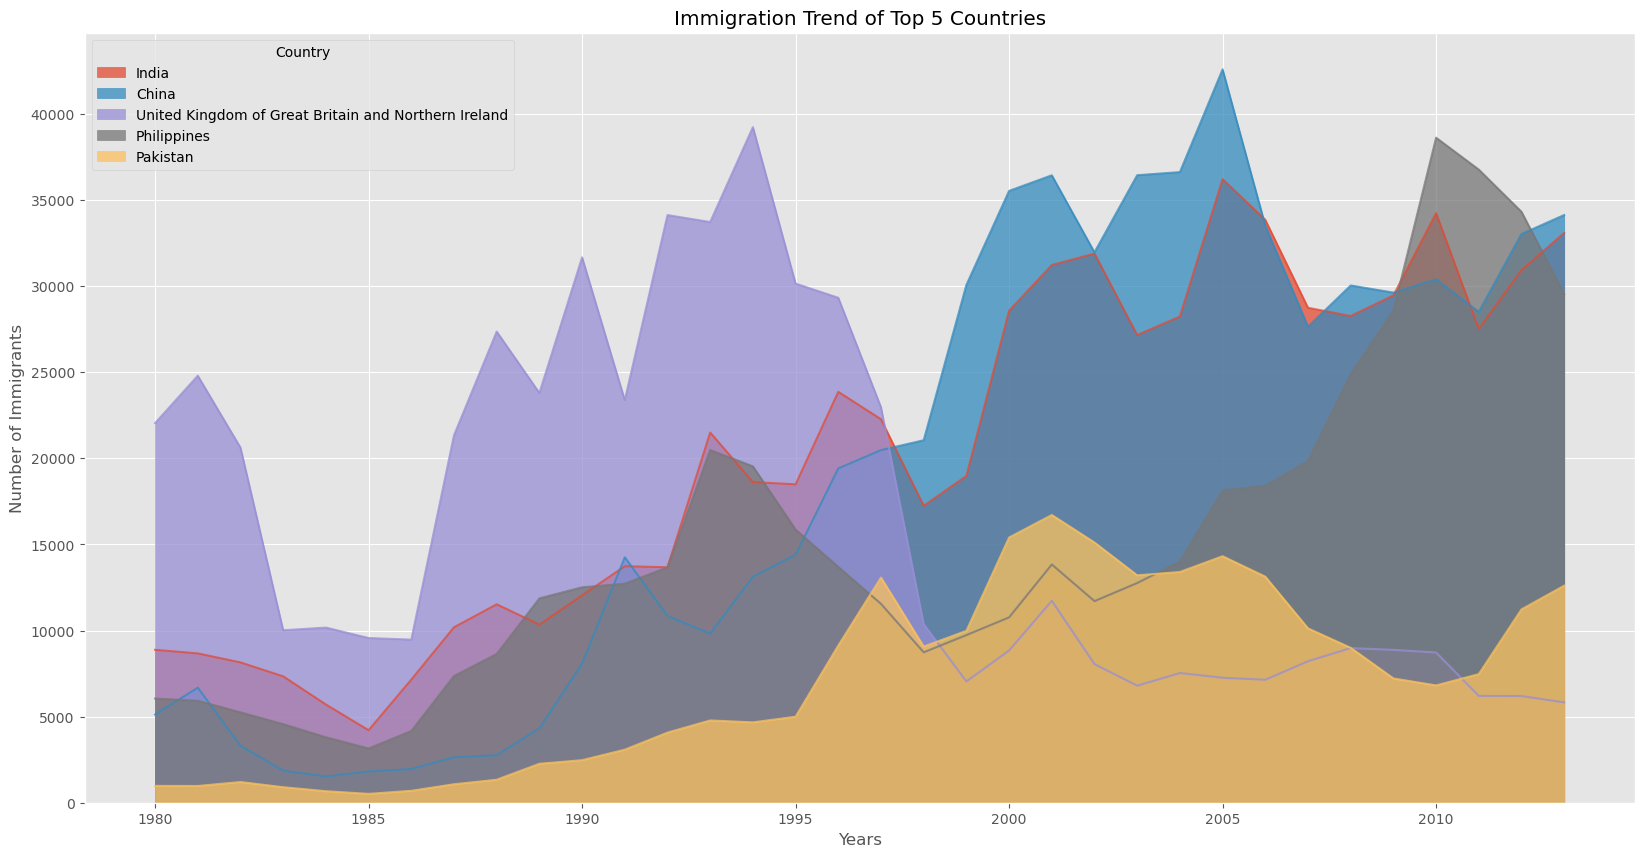

In [17]:
df_top5.plot(kind='area', 
             alpha= 0.75,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

 Visualizing the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013 with Histogram.

In [18]:
# let's quickly view the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [19]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">


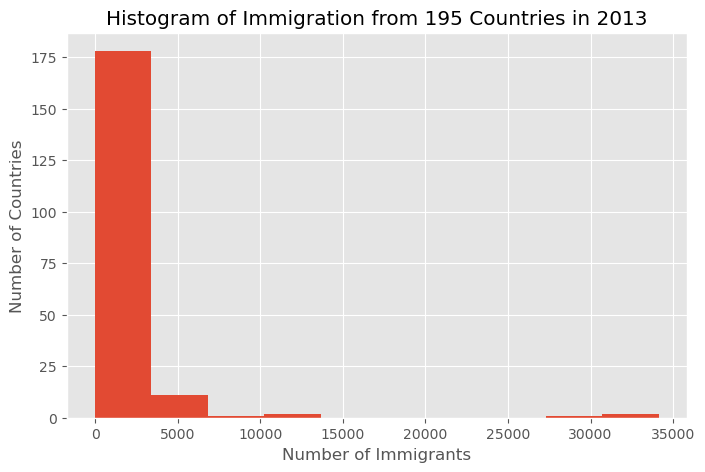

In [20]:
df_can['2013'].plot(kind='hist', figsize=(8,5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

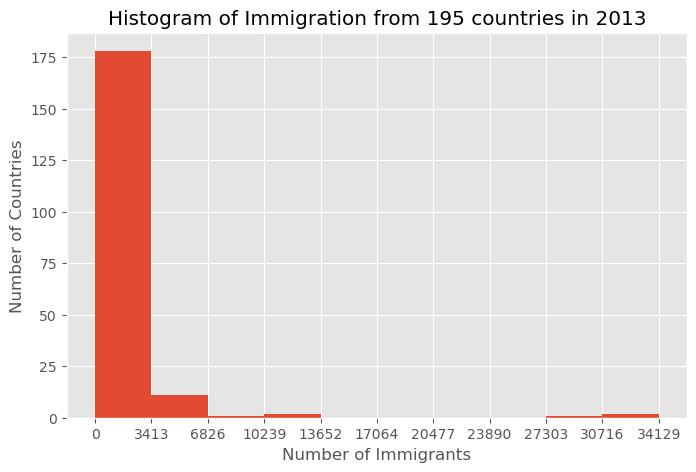

In [21]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**The immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013**

In [22]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [23]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


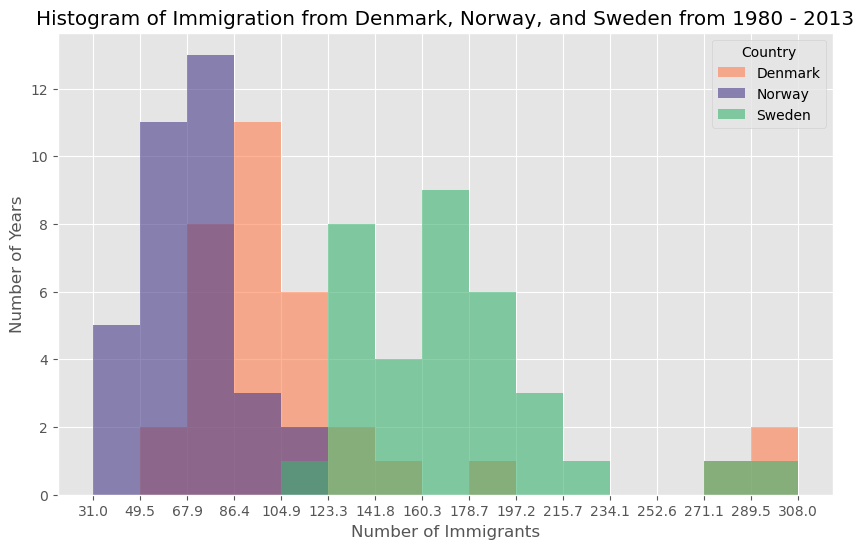

In [24]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# generate histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**The immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013**

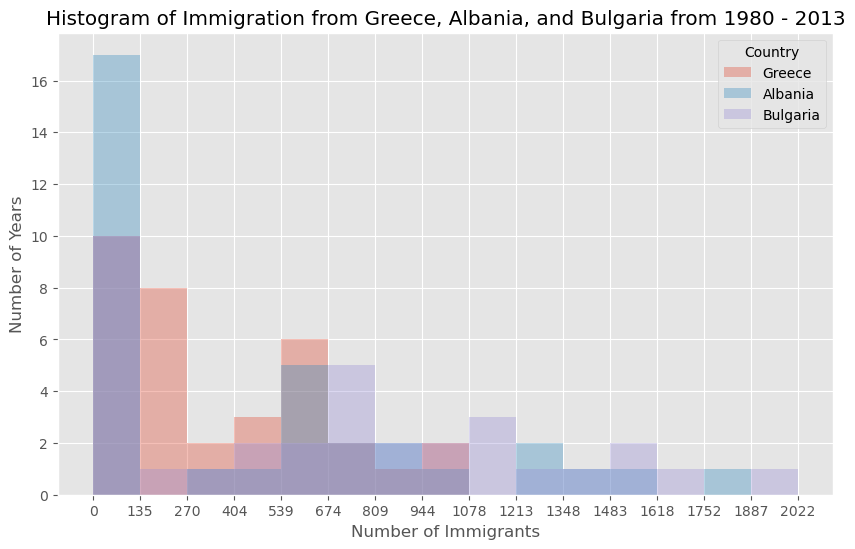

In [25]:
#generate a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece','Albania','Bulgaria'], years]

# transpose the dataframe
df_cof = df_cof.transpose()

# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

df_cof.plot(kind='hist', figsize=(10,6), bins=15, alpha= 0.35, xticks=bin_edges)

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Let's analyze the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

#### Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [26]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

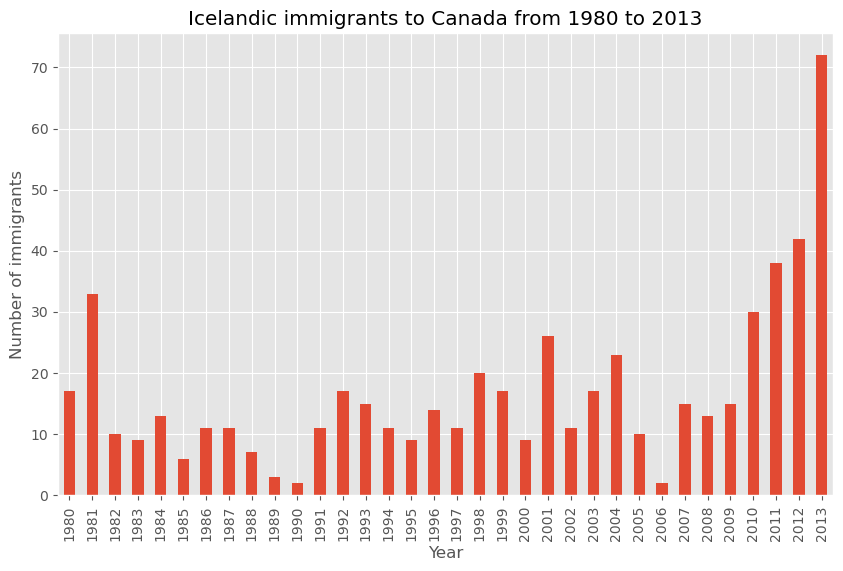

In [27]:
df_iceland.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

#### The total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013

In [28]:
# sort dataframe on 'Total' column
df_can.sort_values('Total', ascending=False, axis=0, inplace= True)

# get top 15 countries
top_15 = df_can['Total'].head(15)
top_15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

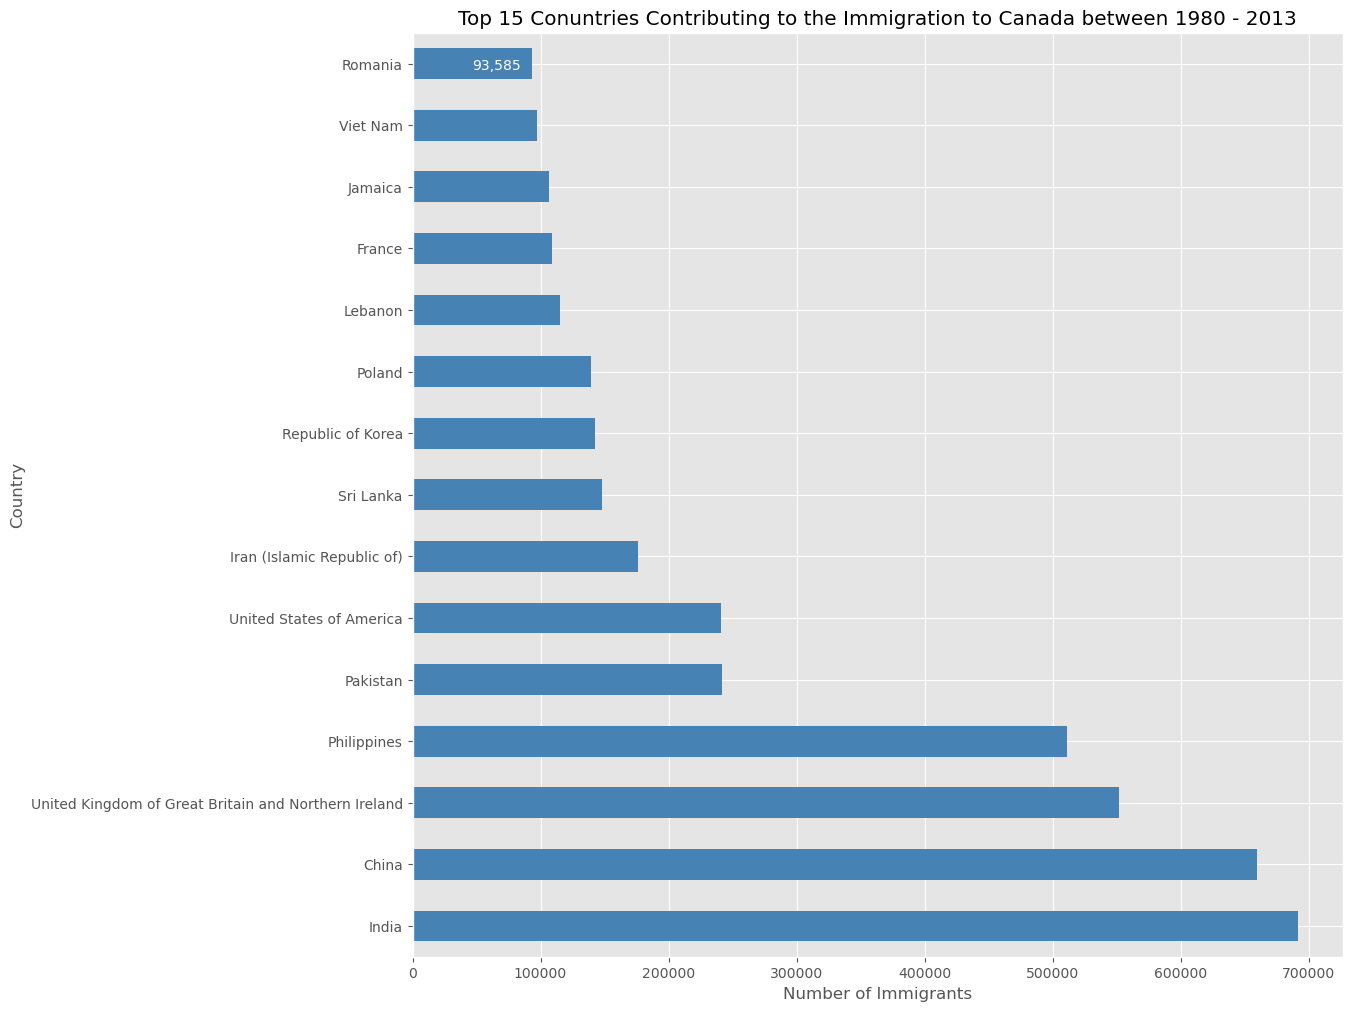

In [29]:
top_15.plot(kind='barh', figsize=(12,12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(top_15): 
    label = format(int(value), ',') # format int with commas
        
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

#### The proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

##### Step 1: Gather data.

We will use pandas `groupby` method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

1. **Split**: Splitting the data into groups based on some criteria.
2. **Apply**: Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
3. **Combine**: Combining the results into a data structure.

In [30]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


##### Step 2: Plot the data. 
We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

* `autopct` - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
* `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
* `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

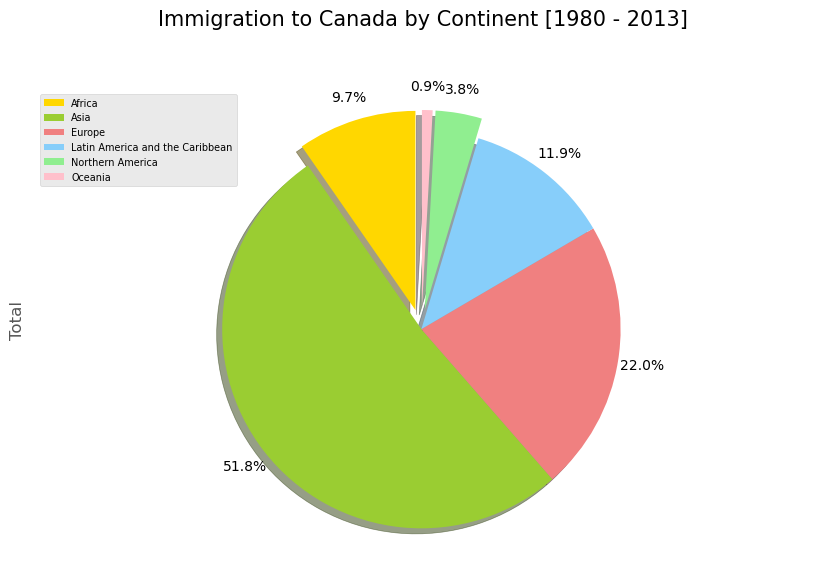

In [31]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left', fontsize=7) 

plt.show()

#### Explore the proportion (percentage) of new immigrants grouped by continents in the year 2013

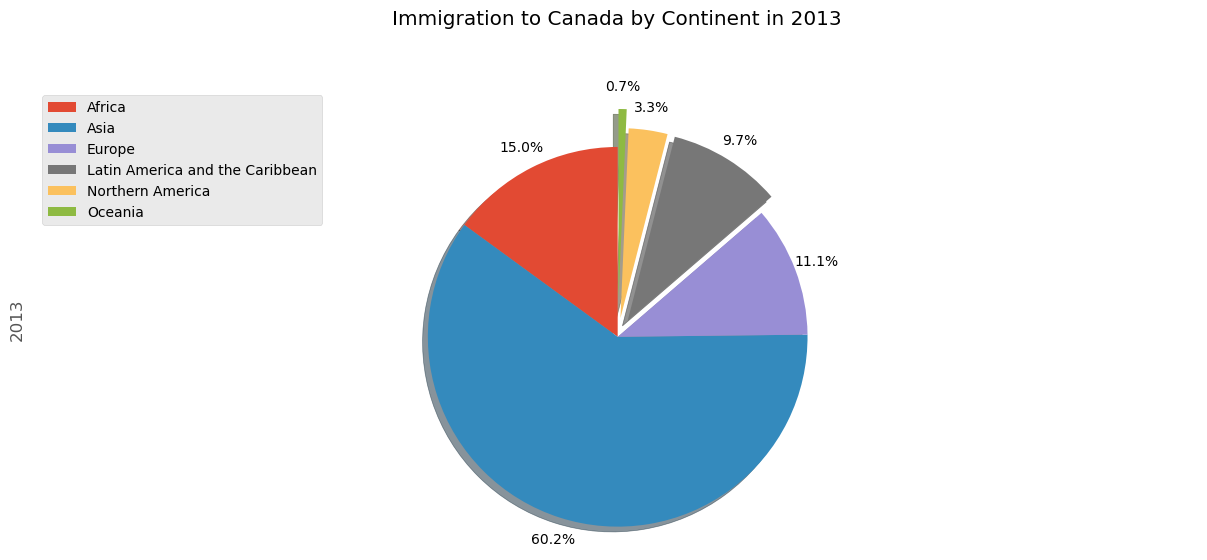

In [32]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                                )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

#### Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

##### Step 1: Get the subset of the dataset. 
Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.

In [33]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


##### Step 2: Plot by passing in `kind='box'`.

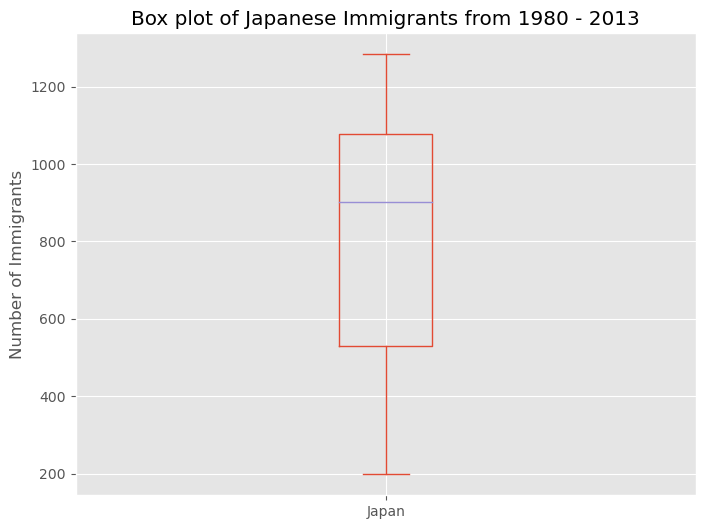

In [34]:
df_japan.plot(kind='box', figsize=(8,6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
3. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.

In [35]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013

In [36]:
#get the dataset for China and India 
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [37]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


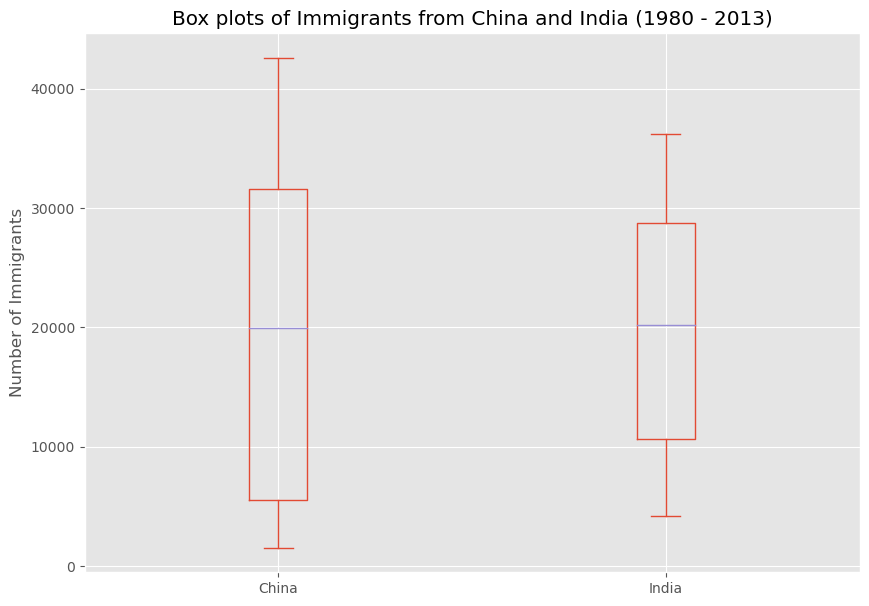

In [38]:
#Plot the Data
df_CI.plot(kind='box', figsize=(10,7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

We can observe that, while both countries have around the same median immigrant population (~20,000), China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

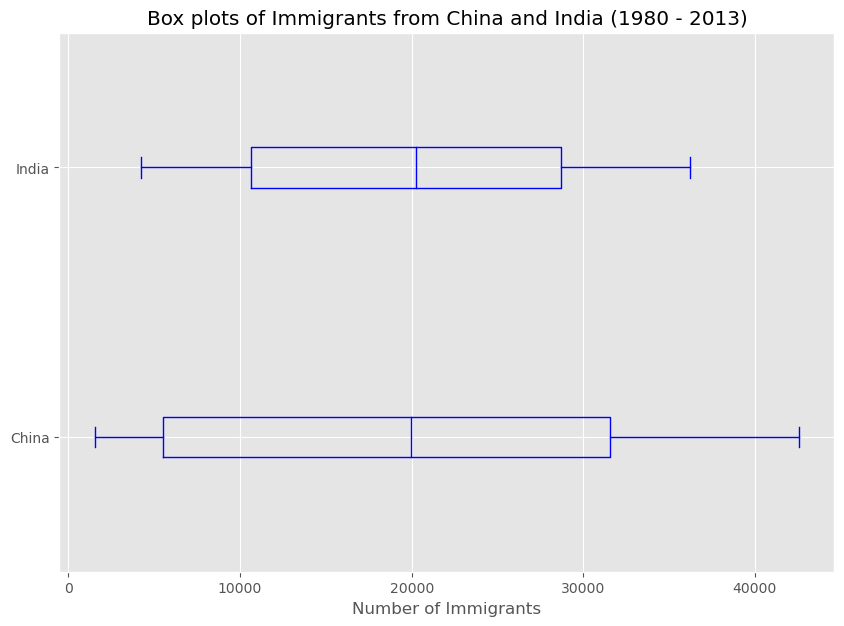

In [39]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

#### Visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s with a box plot.

##### Get the dataset. Get the top 15 countries based on Total immigrant population

In [40]:
df_top15 = df_can.sort_values('Total', ascending= False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Generate a new dataframe which contains the aggregate for each decade. One way to do that:

1. Create a list of all years in decades 80's, 90's, and 00's.
2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3. Merge the three series into a new data frame.

In [41]:
# Do a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [42]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


##### Step 3: Plot the box plots.

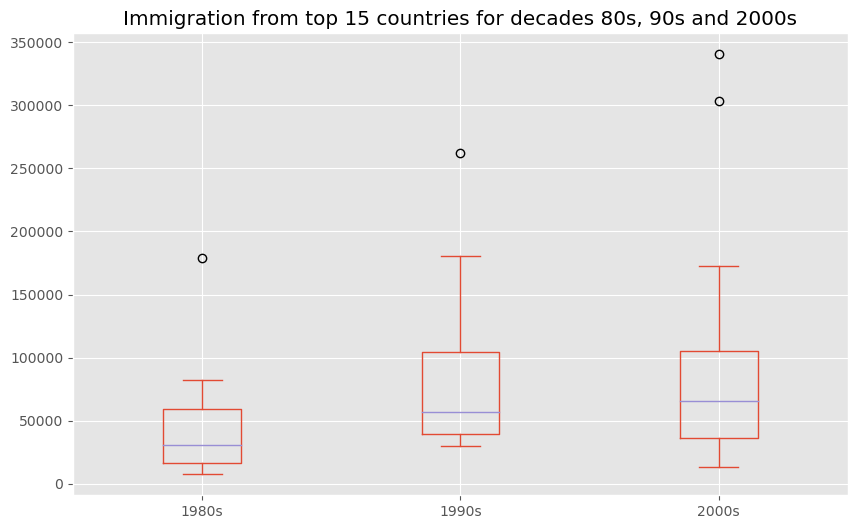

In [43]:
new_df.plot(kind='box', figsize=(10,6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

* larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
* smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example:

* Q1 (25%) = 36,101.5
* Q3 (75%) = 105,505.5
* IQR = Q3 - Q1 = 69,404

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404) \
Outlier > 209,611.5

Let's check how many entries fall above the outlier threshold

In [44]:
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

#### Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

##### Step 1: Get the dataset. Since we are expecting to use the relationship between years and total population, we will convert years to int type.

In [45]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index= map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns = ['year', 'total']

#view the dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


##### Step 2: Plot the data. In `Matplotlib`, we can create a scatter plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

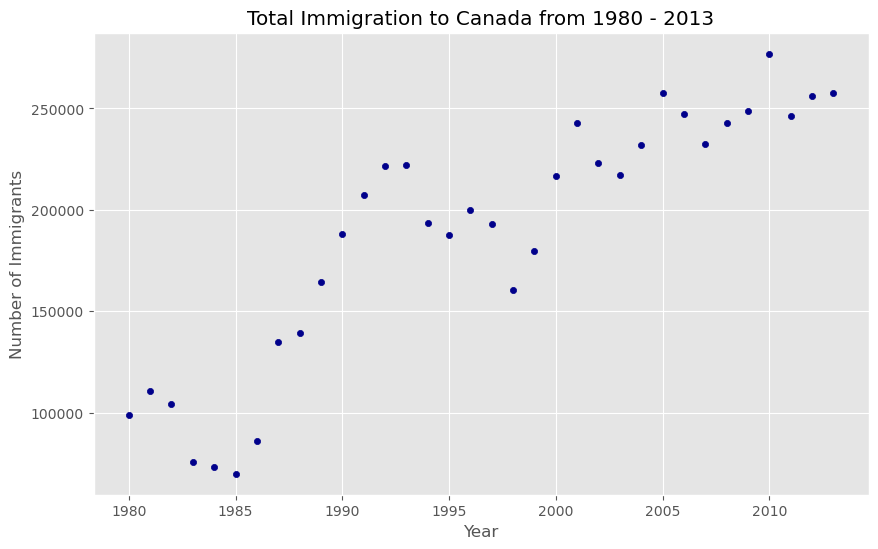

In [46]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

#### Step 1: Get the equation of line of best fit. We will use `Numpy's polyfit()` method by passing in the following:

* x: x-coordinates of the data.
* y: y-coordinates of the data.
* deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [47]:
x = df_tot['year']    #year on x-axis
y = df_tot['total']   #total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the slope in position 0 and intercept in position 1.

#### Step 2: Plot the regression line on the scatter plot.

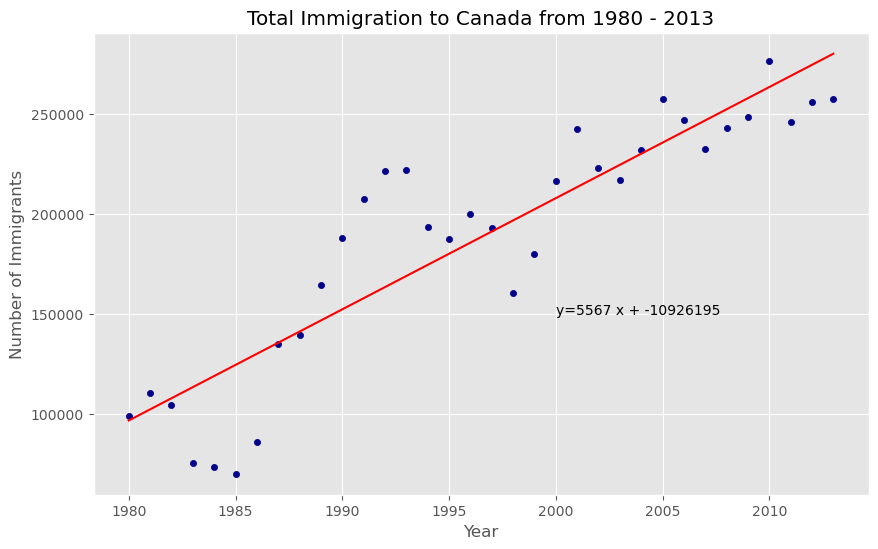

'No. Immigrants = 5567 * Year + -10926195'

In [48]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195 \
No. Immigrants = 5567 * 2015 - 10926195 \
No. Immigrants = 291,310

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


In [49]:
# generate df_countries dataframe
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years].transpose()

#generate df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

#reset index in place
df_total.reset_index(inplace= True)

#rename columns
df_total.columns = ['year','total']

# change column year from string to int to generate scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


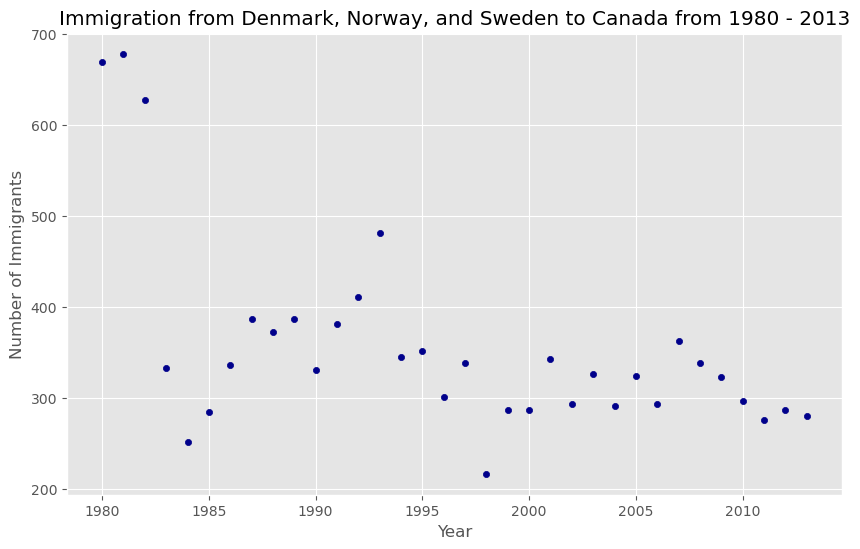

In [50]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()


### Analyze the effect of Argentina's great depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

#### Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.

In [51]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


#### Step 2: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [52]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

#### Step 3: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


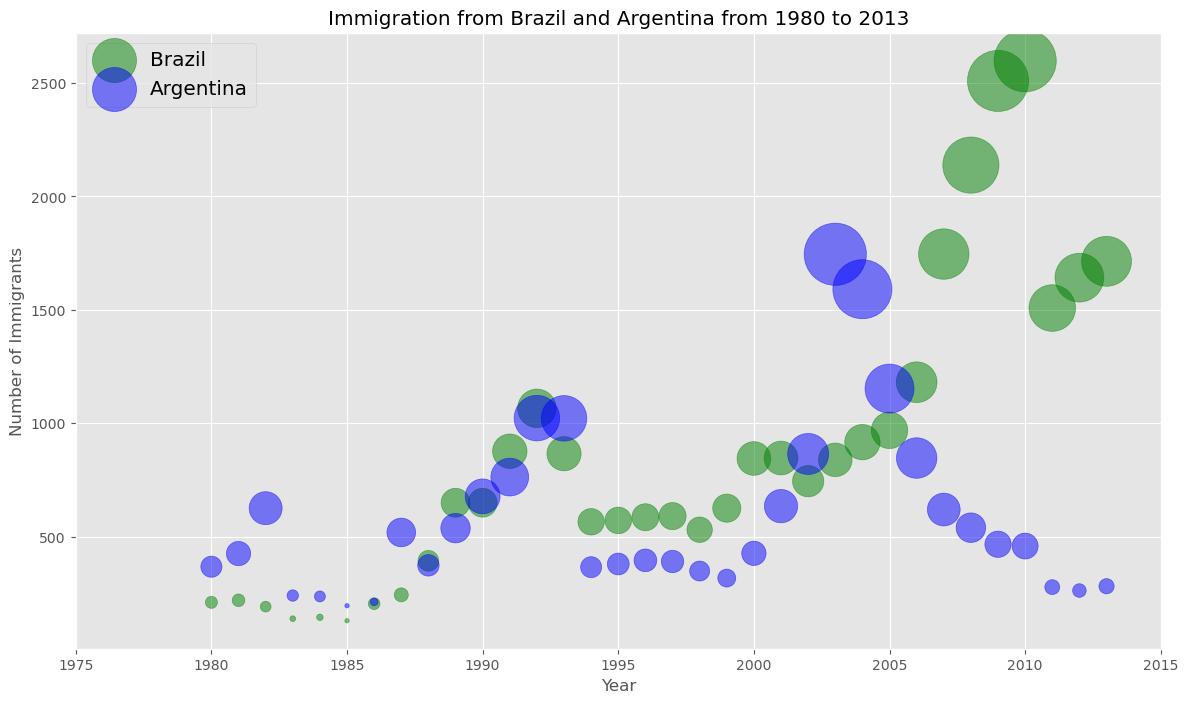

In [54]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large');

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.